In [1]:
import pandas, warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

In [2]:
opentable = lambda url, **kwargs : pandas.read_table(url, sep=',', **kwargs)

movies = opentable("movies.csv")

movies.iloc[:5]

,MovieID,Title,Genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies.tail()

,MovieID,Title,Genre
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [4]:
null = movies.isnull().sum()

null.sum()

np.int64(0)

🚀 Seluruh Kolom Tabel Film Tidak Memiliki Missing Value

In [5]:
shapes = movies.shape

shapes[0]

9742

In [6]:
total_film = movies.iloc[:, 1].nunique()

shapes[0] == total_film

False

In [7]:
double = movies[movies.iloc[:, 1].duplicated()].iloc[:, 1].values

movies[movies.iloc[:, 1].isin(double)]

,MovieID,Title,Genre
650,838,Emma (1996),Comedy|Drama|Romance
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller
5601,26958,Emma (1996),Romance
5854,32600,Eros (2004),Drama
5931,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
6932,64997,War of the Worlds (2005),Action|Sci-Fi
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
9135,147002,Eros (2004),Drama|Romance
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller


🚀 Kolom Title Memiliki 5 Nilai Duplikat

In [8]:
spliter = lambda val : " ".join(val.split("|"))

movies.iloc[:, 2] = movies.iloc[:, 2].apply(spliter)

movies.iloc[:5]

,MovieID,Title,Genre
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
movies[movies.iloc[:, 1].isin(double)]

,MovieID,Title,Genre
650,838,Emma (1996),Comedy Drama Romance
2141,2851,Saturn 3 (1980),Adventure Sci-Fi Thriller
4169,6003,Confessions of a Dangerous Mind (2002),Comedy Crime Drama Thriller
5601,26958,Emma (1996),Romance
5854,32600,Eros (2004),Drama
5931,34048,War of the Worlds (2005),Action Adventure Sci-Fi Thriller
6932,64997,War of the Worlds (2005),Action Sci-Fi
9106,144606,Confessions of a Dangerous Mind (2002),Comedy Crime Drama Romance Thriller
9135,147002,Eros (2004),Drama Romance
9468,168358,Saturn 3 (1980),Sci-Fi Thriller


In [10]:
movies["Total"] = movies.iloc[:, 2].apply(lambda val : len(val.split()))

movies = movies.sort_values(["Title", "Total"], ascending=[True, False])

movies.iloc[:5]

,MovieID,Title,Genre,Total
8600,117867,'71 (2014),Action Drama Thriller War,4
8014,97757,'Hellboy': The Seeds of Creation (2004),Action Adventure Comedy Documentary Fantasy,5
5528,26564,'Round Midnight (1986),Drama Musical,2
5690,27751,'Salem's Lot (2004),Drama Horror Mystery Thriller,4
614,779,'Til There Was You (1997),Drama Romance,2


In [11]:
movies = movies.drop_duplicates(subset="Title", keep="first")

movies[movies.iloc[:, 1].isin(double)]

,MovieID,Title,Genre,Total
9106,144606,Confessions of a Dangerous Mind (2002),Comedy Crime Drama Romance Thriller,5
650,838,Emma (1996),Comedy Drama Romance,3
9135,147002,Eros (2004),Drama Romance,2
2141,2851,Saturn 3 (1980),Adventure Sci-Fi Thriller,3
5931,34048,War of the Worlds (2005),Action Adventure Sci-Fi Thriller,4


🚀 Mengambil Title Duplikat Dengan Genres Terbanyak

In [12]:
movies = movies.sort_values("MovieID", ascending=True).drop("Total", axis='columns')

movies.iloc[:5]

,MovieID,Title,Genre
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
shapes = movies.shape

total_film = movies.iloc[:, 1].nunique()

assert shapes[0] == total_film, "Fail !"

🚀 Kolom Title Tidak Memiliki Duplikat Title

In [14]:
movies["Genre"].str.split(" ").explode().nunique()

22

In [15]:
details = movies['Genre'].str.split(" ").explode().value_counts().to_frame()

details = details.reset_index()

details.columns = ['Genre', 'Total']

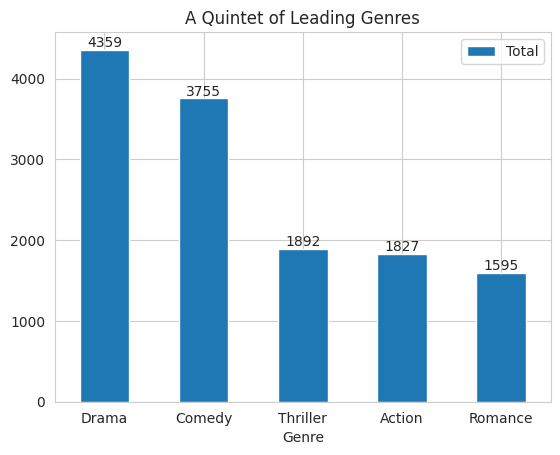

In [16]:
import seaborn as sns; sns.set_style('whitegrid')

title = "A Quintet of Leading Genres"

plot = details.iloc[:5].set_index('Genre').plot.bar(rot = 0, title = title)

plot.bar_label(plot.containers[0]);